In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset=fetch_california_housing()
X,y=dataset.data,dataset.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X= StandardScaler().fit_transform(X)

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=(X.shape[1],))])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='rmsprop', loss='mse')

In [ ]:
history=model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 204584.3125 - val_loss: 2165.3545
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 986.4544 - val_loss: 103.0043
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 85.0413 - val_loss: 58.1656
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25.8208 - val_loss: 42.3356
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 128.0561 - val_loss: 39.2197
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 35.5762 - val_loss: 37.2729
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 68.2165 - val_loss: 36.4846
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 53.1138 - val_loss: 28.6934
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 35.3137 - val_loss: 25.6682
Epoch 10/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.9740 - val_loss: 22.0193
Epoch 11/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 54.5238 - val_loss: 21.8921
Epoch 12/20
413/413 ━━

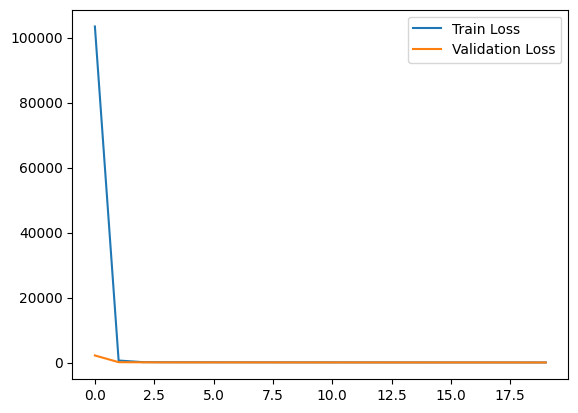

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

Task 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load data
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# Prepare data
X = train.drop(columns=['label']).values / 255.0  # Normalize
y = to_categorical(train['label'], num_classes=10)

# Split into train & validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

# Compile & train
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

# Predict test data
X_test = test.values / 255.0
predictions = np.argmax(model.predict(X_test), axis=1)

pd.DataFrame({'ImageId': np.arange(1, len(predictions) + 1), 'Label': predictions}).to_csv('Digit_sample_submission.csv', index=False)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5917 - loss: 1.3409 - val_accuracy: 0.8416 - val_loss: nan
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8783 - loss: 0.4639 - val_accuracy: 0.8721 - val_loss: nan
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9235 - loss: 0.3198 - val_accuracy: 0.8735 - val_loss: nan
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9359 - loss: 0.2344 - val_accuracy: 0.8852 - val_loss: nan
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9441 - loss: 0.2079 - val_accuracy: 0.8997 - val_loss: nan
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9614 - loss: 0.1600 - val_accuracy: 0.8924 - val_loss: nan
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9598 - loss: 0.1471 - val_accuracy: 0.8939 - val_loss: nan
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9745 - loss: 0.1169 - val_accuracy: 0.9172 - val_loss: nan
Epoch 9/10
22/22 ━━

task 3

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with batch size 16...
Training with batch size 32...
Training with batch size 64...


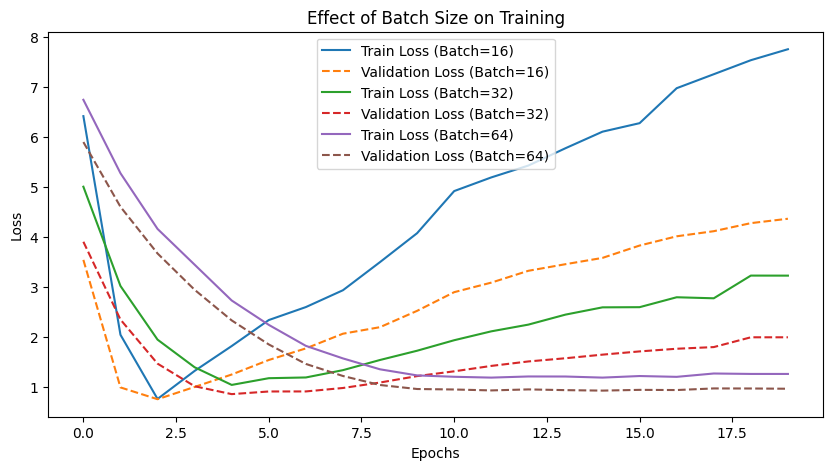

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler


dataset = fetch_california_housing()
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

batch_sizes = [16, 32, 64]
histories = {}

for batch in batch_sizes:
    model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=(X_train.shape[1],))])
    model.compile(optimizer='rmsprop', loss='mse')

    print(f"Training with batch size {batch}...")
    history = model.fit(X_train, y_train, epochs=20, batch_size=batch, validation_split=0.2, verbose=0)
    histories[batch] = history.history

plt.figure(figsize=(10, 5))
for batch in batch_sizes:
    plt.plot(histories[batch]['loss'], label=f'Train Loss (Batch={batch})')
    plt.plot(histories[batch]['val_loss'], label=f'Validation Loss (Batch={batch})', linestyle='dashed')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Effect of Batch Size on Training')
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


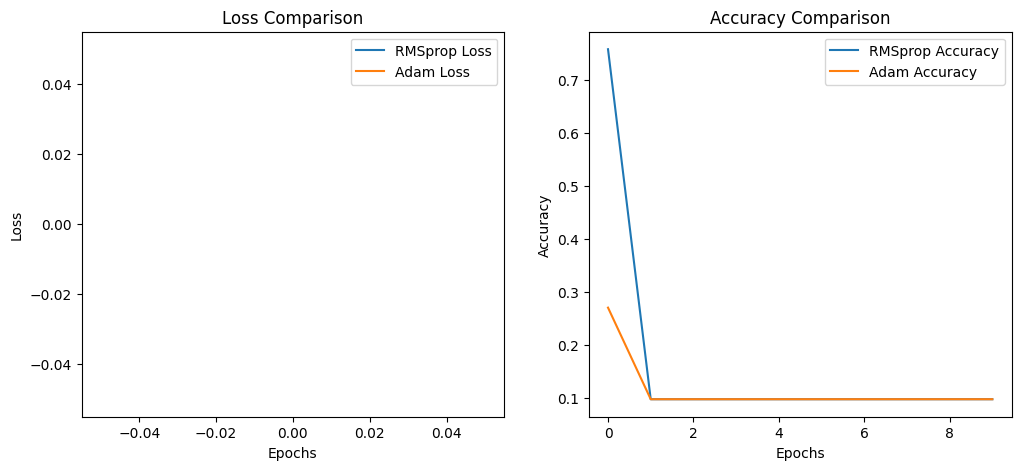

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load dataset
train = pd.read_csv('/content/train.csv')
X = train.drop(columns=['label']).values / 255.0  # Normalize
y = to_categorical(train['label'], num_classes=10)  # One-hot encode

# Split into training & validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train model with a given optimizer
def train_model(optimizer):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val), verbose=0)
    return history.history

# Train with RMSprop & Adam
history_rmsprop = train_model('rmsprop')
history_adam = train_model('adam')

# Plot results
plt.figure(figsize=(12, 5))

# Loss comparison
plt.subplot(1, 2, 1)
plt.plot(history_rmsprop['loss'], label='RMSprop Loss')
plt.plot(history_adam['loss'], label='Adam Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Comparison')

# Accuracy comparison
plt.subplot(1, 2, 2)
plt.plot(history_rmsprop['accuracy'], label='RMSprop Accuracy')
plt.plot(history_adam['accuracy'], label='Adam Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Comparison')

plt.show()